In [1]:
#首先导入三个必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
data_path = 'Bike-Sharing-Dataset/hour.csv'
rides = pd.read_csv(data_path)


In [3]:
#打印数据前5 行
rides.head()
#rides.head(10) 打印数据前10行
#rides.tail()   打印数据最后5行

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
#通过该函数我们可以了解数据缺省值的情况，貌似没有缺省值
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
#通过该函数我们了解每个特征（每列数据）的大概信息，平均值，方差等信息。
rides.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
#我们画出随着时间变化共享单车的使用情况。
rides[:24*10].plot(x='dteday', y='cnt')

In [13]:
rides['season'].head()

0    1
1    1
2    1
3    1
4    1
Name: season, dtype: int64

In [12]:
season_dummies=pd.get_dummies(rides['season'],prefix='season')
print season_dummies.head()

   season_1  season_2  season_3  season_4
0         1         0         0         0
1         1         0         0         0
2         1         0         0         0
3         1         0         0         0
4         1         0         0         0


解释一下：原来只有season这个字段，里面会填入1，2，3，4这四种值，我们将它处理后就变成四个新的字段season_1  season_2  season_3 season_4四个特征。

In [14]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)
fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']

scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

In [22]:
#下面我们需要对数据集拆分成训练集，测试集

test_data = data[-21*24:]

data = data[:-21*24]

target_fields = ['cnt', 'casual', 'registered']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

In [23]:
#再将训练集拆分出验证集
train_features, train_targets = features[:-60*24], targets[:-60*24]
val_features, val_targets = features[-60*24:], targets[-60*24:]

# 神经网络的构建
这里我们将构建一个三成网络，一个输入层(3个节点)，一个隐藏层(4个节点)和一个输出层(1个节点)，如下图所示：
<img src="assets/neural_network.png" width=300px>

In [24]:
class NeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        #初始化输入节点数，隐藏节点数，输出节点数
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        # 初始化输入层到隐藏层的权重矩阵，这里可以用numpy自带的随机生成矩阵的函数，生成的是一个3行4列的
        self.weights_input_to_hidden = np.random.normal(0.0, self.input_nodes**-0.5, 
                                       (self.input_nodes, self.hidden_nodes))
        #初始化隐藏层到输出层的权重矩阵，是一个4行列的矩阵
        self.weights_hidden_to_output = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                      (self.hidden_nodes, self.output_nodes))
        #初始化学习率
        self.lr = learning_rate
        
        #定义激活函数，这里我们用sigmoid函数
        self.activation_function = lambda x : 1/(1+np.exp(-x))  # Replace 0 with your sigmoid calculation.
                         
    
    def train(self, features, targets):
     
        n_records = features.shape[0]
        delta_weights_i_h = np.zeros(self.weights_input_to_hidden.shape)
        delta_weights_h_o = np.zeros(self.weights_hidden_to_output.shape)
        for X, y in zip(features, targets):
            #-------------------网络前向传播开始---------------#
            #特征值矩阵乘输入层到隐藏层权重得到隐藏层输入
            hidden_inputs = np.matmul(X,self.weights_input_to_hidden) 
            #隐藏层输入经过激活函数激活后得到隐藏层输出
            hidden_outputs = self.activation_function (hidden_inputs) 

            #隐藏层输出矩阵乘隐藏层到输出层的权重得到输出层的输入
            final_inputs = np.matmul(hidden_outputs,self.weights_hidden_to_output) # signals into final output layer
            #！！！注意我们这里不需要激活函数，因为我们要得到的就是车辆使用数，所以不需要激活函数
            final_outputs = final_inputs 
            #-------------------网络前向传播结束---------------#
            
            #------------------网络反向传播开始----------------#
            #权重跟新的公式Δwi=ηδxi  δ(下面的代码中用error_term表示)是指δ=(y−final_output)*f'(∑wixi)，η是指学习率，xi是指激活层的输入
            #(y−final_output)是输出误差，f'(∑wixi)是激活函数的导函数
            #隐藏节点的误差即为输出误差乘以输出层-隐藏层间的权重矩阵
            #计算输出值和实际值之间的误差
            error = y-final_outputs 
            #计算δ，这里为什么等于error呢，因为之后一整没有激活函数，f(x)的导数就是x
            error_term=error
          
            hidden_error =np.dot(self.weights_hidden_to_output,error_term)
             #计算隐藏层的δ
            hidden_error_term = hidden_error * hidden_outputs * (1 - hidden_outputs)
            
            delta_weights_i_h +=  hidden_error_term * X[:,None]
            
            delta_weights_h_o += error_term*hidden_outputs[:,None]
            #------------------反向传播结束--------------------#
        #更新权重
        self.weights_hidden_to_output +=self.lr*delta_weights_h_o/n_records 
        self.weights_input_to_hidden += self.lr*delta_weights_i_h/n_records
 
    def run(self, features):
        
        hidden_inputs = np.matmul(features,self.weights_input_to_hidden) 
        hidden_outputs = self.activation_function(hidden_inputs) 
        
       
        final_inputs = np.matmul(hidden_outputs,self.weights_hidden_to_output)
        final_outputs =final_inputs
        
        return final_outputs

In [25]:
#定义损失函数，这里用MSE
def MSE(y, Y):
    return np.mean((y-Y)**2)

In [26]:
#下面可以进行网络的训练了
import sys
#如果训练集额的loss和验证集的loss相差不大，说明模型没有过拟合的，反之就要考虑模型是不是过拟合了
### 先设置超参数，我们训练的时候可以调节这几个超参数以改变网络，找到更好的网络
iterations = 10000
learning_rate = 0.5
hidden_nodes = 20
output_nodes = 1

N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
#迭代10000次，
for ii in range(iterations):
    #每次从训练集中选出选出128条数据进行训练，为什么要设置batch
    #因为一次训练数据太大，所以我们分批次输入训练，一次输入128条数据，最终loss的结果不影响
    batch = np.random.choice(train_features.index, size=128)
    X, y = train_features.ix[batch].values, train_targets.ix[batch]['cnt']                            
    network.train(X, y)
    #计算train_loss和validation loss并进行打印
    train_loss = MSE(network.run(train_features).T, train_targets['cnt'].values)
    val_loss = MSE(network.run(val_features).T, val_targets['cnt'].values)
    sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    sys.stdout.flush()
    #将连个loss存起来一会党营观察他们变化情况
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

Progress: 0.1% ... Training loss: 0.780 ... Validation loss: 1.705

/Library/Python/2.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Progress: 100.0% ... Training loss: 0.050 ... Validation loss: 0.141

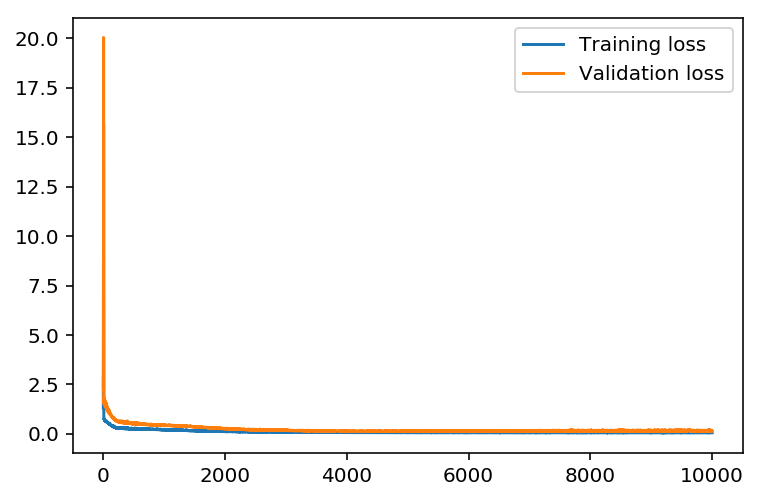

In [27]:
#让我们来观察一下training loss和validation之间的变化情况，从而判断是否过拟合
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

/Library/Python/2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


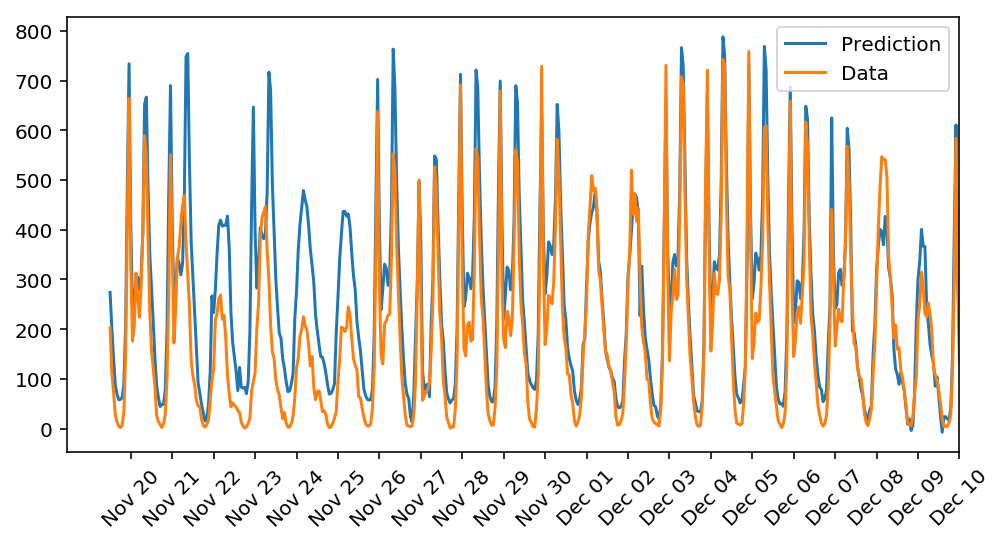

In [28]:
#下面看一下模型的测试情况
fig, ax = plt.subplots(figsize=(8,4))

mean, std = scaled_features['cnt']
predictions = network.run(test_features).T*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['cnt']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.ix[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)